In [390]:
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image as pil_image

# Determine the size of each image
from os.path import isfile

%matplotlib inline

# BackGround

After centuries of intense whaling, recovering whale populations still have a hard time adapting to warming oceans and struggle to compete every day with the industrial fishing industry for food.

To aid whale conservation efforts, scientists use photo surveillance systems to monitor ocean activity. They use the shape of whales’ tails and unique markings found in footage to identify what species of whale they’re analyzing and meticulously log whale pod dynamics and movements. For the past 40 years, most of this work has been done manually by individual scientists, leaving a huge trove of data untapped and underutilized.

In this competition, you’re challenged to build an algorithm to identify individual whales in images. You’ll analyze Happywhale’s database of over 25,000 images, gathered from research institutions and public contributors. By contributing, you’ll help to open rich fields of understanding for marine mammal population dynamics around the globe.

Note, this competition is similar in nature to this competition with an expanded and updated dataset.

We'd like to thank Happywhale for providing this data and problem. Happywhale is a platform that uses image process algorithms to let anyone to submit their whale photo and have it automatically identified. 

# Goal
*Identify a Whale by its tail.* 

# Dataset Description

This training data contains thousands of images of humpback whale flukes. Individual whales have been identified by researchers and given an Id. The challenge is to predict the whale Id of images in the test set. What makes this such a challenge is that there are only a few examples for each of 3,000+ whale Ids.

# File descriptions

* train.zip - a folder containing the training images
* train.csv - maps the training Image to the appropriate whale Id. Whales that are not predicted to have a label identified * in the training data should be labeled as new_whale.
* test.zip - a folder containing the test images to predict the whale Id
* sample_submission.csv - a sample submission file in the correct format


## Showing some images

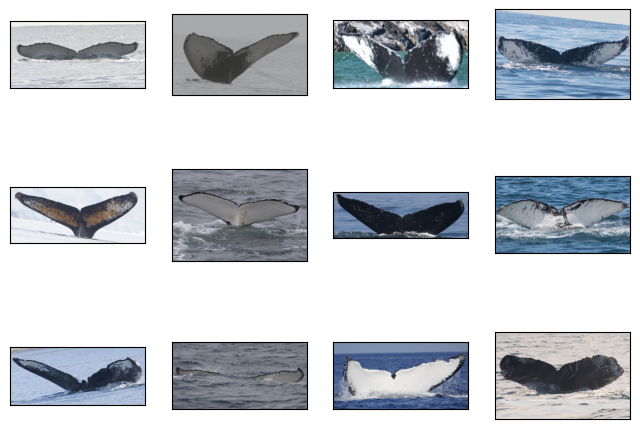

In [391]:
import os
fig = plt.figure(figsize=(8, 8 ), dpi=100,facecolor='w', edgecolor='k')
train_imgs = os.listdir("./train/")
for idx, img in enumerate(np.random.choice(train_imgs, 12)):
    ax = fig.add_subplot(4, 20//5, idx+1, xticks=[], yticks=[])
    im = pil_image.open("./train/" + img)
    plt.imshow(im)

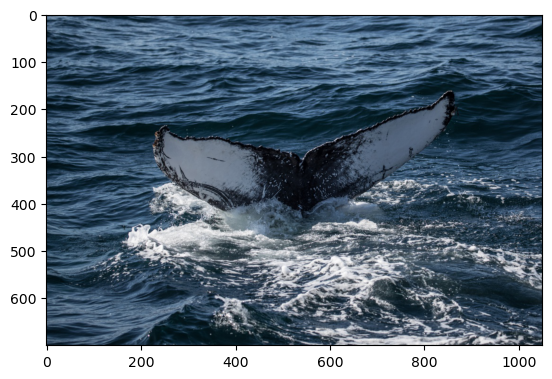

In [392]:
import cv2
# If you need to install CV: https://stackoverflow.com/questions/19876079/cannot-find-module-cv2-when-using-opencv
# helpful: https://stackoverflow.com/questions/54959387/rgb-image-display-in-matplotlib-plt-imshow-returns-a-blue-image
im = cv2.imread("./train/"+train_imgs[0] , 1)

image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

pixels = np.array(image)

plt.imshow(pixels)
plt.show()

## Importing Dataset

In [393]:
# load image data
#image name
train_df = pd.read_csv('./train.csv')
ye = pd.DataFrame()
ye = train_df[train_df['Id'] == 'new_whale']
# print(ye.head())
df = pd.DataFrame()

for val in ["new_whale","w_23a388d",'w_9b5109b','w_9c506f6','w_0369a5c','w_700ebb4','w_3de579a','w_564a34b','w_fd3e556','w_88e4537']:
    ye = train_df[train_df['Id'] == val]
    # print(ye.head())
    df = df.append(ye, ignore_index=True)
# train_df = train_df[train_df['Id'] != ["new_whale","w_23a388d",'w_9b5109b','w_9c506f6','w_0369a5c','w_700ebb4','w_3de579a','w_564a34b','w_fd3e556','w_88e4537']]
train_df = df
print(df.head())
# train_df.head(10)

           Image         Id
0  00050a15a.jpg  new_whale
1  0005c1ef8.jpg  new_whale
2  0006e997e.jpg  new_whale
3  000f0f2bf.jpg  new_whale
4  001d7450c.jpg  new_whale


C:\Users\Angel\AppData\Local\Temp\ipykernel_11368\3996476797.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(ye, ignore_index=True)


In [394]:
train_df.tail(10)

,Image,Id
10176,d753c6a96.jpg,w_88e4537
10177,db1f2e9e4.jpg,w_88e4537
10178,e990bcf97.jpg,w_88e4537
10179,eadf6af45.jpg,w_88e4537
10180,f0109bc35.jpg,w_88e4537
10181,f187a1ca7.jpg,w_88e4537
10182,f6084a1aa.jpg,w_88e4537
10183,f6321c36a.jpg,w_88e4537
10184,f6ddf279f.jpg,w_88e4537
10185,fa5211df9.jpg,w_88e4537


In [395]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10186 entries, 0 to 10185
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   10186 non-null  object
 1   Id      10186 non-null  object
dtypes: object(2)
memory usage: 159.3+ KB


In [396]:
# rows and columns
train_df.shape

(10186, 2)

In [397]:
train_df.shape[0]

10186

In [398]:
train_df.describe()

,Image,Id
count,10186,10186
unique,10186,10
top,00050a15a.jpg,new_whale
freq,1,9664


In [399]:
# Top 10 labels
train_df["Id"].value_counts()[:10]

new_whale    9664
w_23a388d      73
w_9b5109b      65
w_9c506f6      62
w_0369a5c      61
w_700ebb4      57
w_3de579a      54
w_564a34b      51
w_fd3e556      50
w_88e4537      49
Name: Id, dtype: int64

In [400]:
# topTen = ["new_whale","w_23a388d",'w_9b5109b','w_9c506f6','w_0369a5c','w_700ebb4','w_3de579a','w_564a34b','w_fd3e556','w_88e4537']

### Creating x_train and y_train

In [401]:
y = train_df["Id"]

# drop the id column
X = train_df.drop(['Id'], axis=1)
print(y[0])
y.head()

new_whale


0    new_whale
1    new_whale
2    new_whale
3    new_whale
4    new_whale
Name: Id, dtype: object

In [402]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

print(X_train)
print(y_train)


# print(X_test)

              Image
2605  440e7084f.jpg
3949  67de4e258.jpg
8823  e959aee96.jpg
7744  cc87738d5.jpg
2177  395bd665c.jpg
...             ...
5734  96447d743.jpg
5191  87d0764cf.jpg
5390  8d5f910a0.jpg
860   164bcdca1.jpg
7270  bf70f5f82.jpg

[6824 rows x 1 columns]
2605    new_whale
3949    new_whale
8823    new_whale
7744    new_whale
2177    new_whale
          ...    
5734    new_whale
5191    new_whale
5390    new_whale
860     new_whale
7270    new_whale
Name: Id, Length: 6824, dtype: object


In [403]:
X_train.head()

,Image
2605,440e7084f.jpg
3949,67de4e258.jpg
8823,e959aee96.jpg
7744,cc87738d5.jpg
2177,395bd665c.jpg


## Prepareing images
Prepocess



In [404]:
# from keras.preprocessing import image
import keras.utils as image
from keras.applications.imagenet_utils import preprocess_input

In [405]:
# # list that holds elemnts given that are list of 100 of list of 100 with 3 elements
# x_train = np.zeros((2, 4,3,5))

# print(x_train)

In [406]:
def prepareImages(train, shape, path):
    # list that holds elemnts given that are list of 100 of list of 100 with 3 elements
    # i.e.   num of images of size 100x100x3 
    X_train = np.zeros((shape, 100, 100, 3))
    count = 0
    
    # helpful link: https://www.tensorflow.org/api_docs/python/tf/keras/utils/img_to_array
    for i in train['Image']:
        # print(fig)
        
        #load images into images of size 100x100x3
        # helpful link: https://www.tensorflow.org/api_docs/python/tf/keras/utils/load_img
        img = image.load_img("./"+path+"/"+i, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)
        # print(x)

        X_train[count] = x
        if (count < 10):
            print("Image:", i, "processed")
        count += 1
    
    return X_train

In [407]:
X_train = prepareImages(X_train, X_train.shape[0], "train")

Image: 440e7084f.jpg processed
Image: 67de4e258.jpg processed
Image: e959aee96.jpg processed
Image: cc87738d5.jpg processed
Image: 395bd665c.jpg processed
Image: d8e6841bd.jpg processed
Image: 3de405832.jpg processed
Image: 56850b285.jpg processed
Image: a46b2bf90.jpg processed
Image: ff86fe8c4.jpg processed


## Normalize the data

In [408]:
# simply normalize the features to the range of [0,1]:
print(X_train.shape)
X_train = X_train.astype('float32')
X_train /= 255.0

(6824, 100, 100, 3)


In [409]:
print(X_train.shape)

(6824, 100, 100, 3)


In [410]:
print(X_train)

[[[[ 0.55710196  0.45184705  0.3149804 ]
   [ 0.56886667  0.46361178  0.3267451 ]
   [ 0.55710196  0.41655293  0.24047059]
   ...
   [ 0.53357255  0.43616077  0.3620392 ]
   [ 0.53357255  0.42831764  0.33066666]
   [ 0.53357255  0.43616077  0.3620392 ]]

  [[ 0.529651    0.37341568  0.2012549 ]
   [ 0.5649451   0.45576864  0.3267451 ]
   [ 0.5531804   0.4596902   0.3149804 ]
   ...
   [ 0.5374941   0.42831764  0.3385098 ]
   [ 0.529651    0.42439607  0.31105882]
   [ 0.53357255  0.42439607  0.33458823]]

  [[ 0.5649451   0.4204745   0.22870588]
   [ 0.5414157   0.41263136  0.22478431]
   [ 0.5414157   0.4322392   0.27968627]
   ...
   [ 0.5374941   0.42439607  0.33458823]
   [ 0.529651    0.42439607  0.30713725]
   [ 0.529651    0.42439607  0.32282352]]

  ...

  [[ 0.55710196  0.46753335  0.32282352]
   [ 0.4982784   0.33812156  0.15027452]
   [ 0.54533726  0.29890588  0.03654902]
   ...
   [ 0.56102353  0.41263136  0.2522353 ]
   [ 0.56886667  0.44792548  0.30713725]
   [ 0.5767098  

In [411]:
print(X_train.shape)

(6824, 100, 100, 3)


### Display some images

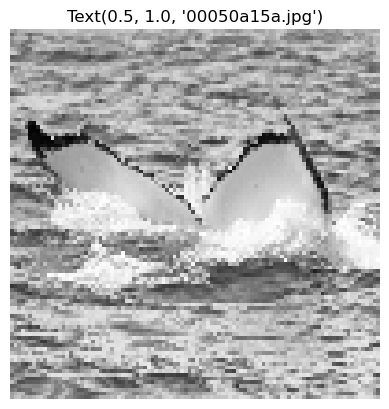

In [412]:

# https://stackoverflow.com/questions/40557910/plt-plot-meaning-of-0-and-1
# print(X_train[2][:,:])
plt.imshow(X_train[2][:,:,0], cmap="gray")
plt.title(plt.title(train_df.iloc[0,0]))
plt.axis("off")
plt.show()



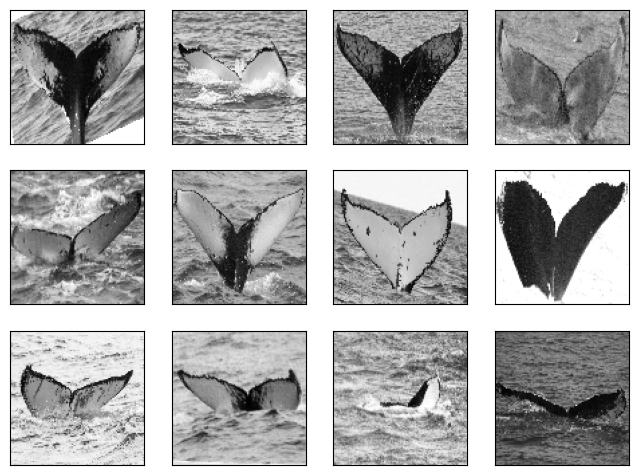

In [413]:
fig = plt.figure(figsize=(8, 8 ), dpi=100,facecolor='w', edgecolor='k')
train_imgs = os.listdir("./train/")
# show the first 12 images
for idx, img in enumerate(np.random.choice(train_imgs, 12)):
    ax = fig.add_subplot(4, 20//5, idx+1, xticks=[], yticks=[])
    plt.imshow(X_train[idx+1][:,:,0], "gray")
    

### Encoding Label

The labels are IDs such as "w_f48451c" so we need to encode them.

In [414]:
print(y_train.shape)

(6824,)


In [415]:
print(y_train)

2605    new_whale
3949    new_whale
8823    new_whale
7744    new_whale
2177    new_whale
          ...    
5734    new_whale
5191    new_whale
5390    new_whale
860     new_whale
7270    new_whale
Name: Id, Length: 6824, dtype: object


In [416]:
train_df.Id.describe()

count         10186
unique           10
top       new_whale
freq           9664
Name: Id, dtype: object

In [417]:
from keras.utils import np_utils 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [418]:
y_train = label_encoder.fit_transform(y_train)
# THe zeros indicate new whales
y_train[0:10]  

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [419]:
y_train = np_utils.to_categorical(y_train, 10)

In [420]:
# (rows, cols)
print(y_train.shape)

(6824, 10)


In [421]:
print(y_train)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [422]:
# np.random.seed(0)

## Defining the Network Archetecture (model)

In [423]:


# THis model is so we can stack neural net3orks
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D,Conv2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization


In [424]:

# The Sequential model for the network
model = Sequential()

In [425]:
# CNN first layer with 16 output filters with 5x5 convoltion ( kernal_size) 
model.add(Convolution2D(filters = 16, kernel_size = (5,5),padding="same", input_shape = (100,100,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
print(model.output_shape)

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
print(model.output_shape)


(None, 100, 100, 16)
(None, 50, 50, 16)


In [426]:


# adding hidden layers
model.add(Convolution2D(filters  = 32,kernel_size  = (3, 3) ,strides=2,padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
print(model.output_shape)

# Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
print(model.output_shape)


(None, 25, 25, 32)
(None, 12, 12, 32)


In [427]:
# gonna do the same as last layer
model.add(Convolution2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
print(model.output_shape)

model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
print(model.output_shape)

(None, 12, 12, 64)
(None, 6, 6, 64)


In [428]:


# output Fully connected Dense layers:
model.add(Flatten())
print(model.output_shape)

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
print(model.output_shape)

model.add(Dropout(0.5))
model.add(BatchNormalization())
# output layer that will categorize the images  usubng the amount of unique nodes
model.add(Dense(y_train.shape[1], activation='softmax'))
print(model.output_shape)



(None, 2304)
(None, 128)
(None, 10)


In [429]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 100, 100, 16)      1216      
                                                                 
 batch_normalization_20 (Bat  (None, 100, 100, 16)     64        
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 100, 100, 16)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 50, 50, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 25, 25, 32)        4640      
                                                                 
 batch_normalization_21 (Bat  (None, 25, 25, 32)      

## Compile Model

In [430]:
# Adam will change the learning rate during training
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [431]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 100, 100, 16)      1216      
                                                                 
 batch_normalization_20 (Bat  (None, 100, 100, 16)     64        
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 100, 100, 16)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 50, 50, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 25, 25, 32)        4640      
                                                                 
 batch_normalization_21 (Bat  (None, 25, 25, 32)      

# Training

In [432]:
epochs = 100  
batch_size = 100

In [433]:
import tensorflow
# name='/physical_device:GPU:0'
# '/device:GPU:0'
with tensorflow.device('/device:GPU:0'):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/100
69/69 [==============================] - 14s 191ms/step - loss: 2.1653 - accuracy: 0.3819
Epoch 2/100
69/69 [==============================] - 13s 193ms/step - loss: 0.8419 - accuracy: 0.8724
Epoch 3/100
69/69 [==============================] - 13s 192ms/step - loss: 0.3714 - accuracy: 0.9390
Epoch 4/100
69/69 [==============================] - 13s 190ms/step - loss: 0.2936 - accuracy: 0.9468
Epoch 5/100
69/69 [==============================] - 13s 190ms/step - loss: 0.2694 - accuracy: 0.9478
Epoch 6/100
69/69 [==============================] - 13s 190ms/step - loss: 0.2532 - accuracy: 0.9486
Epoch 7/100
69/69 [==============================] - 13s 190ms/step - loss: 0.2355 - accuracy: 0.9496
Epoch 8/100
69/69 [==============================] - 13s 193ms/step - loss: 0.2425 - accuracy: 0.9484
Epoch 9/100
69/69 [==============================] - 13s 190ms/step - loss: 0.2216 - accuracy: 0.9513
Epoch 10/100
69/69 [==============================] - 13s 190ms/step - loss: 0.223

### Model evaluation/Visualization

dict_keys(['loss', 'accuracy'])


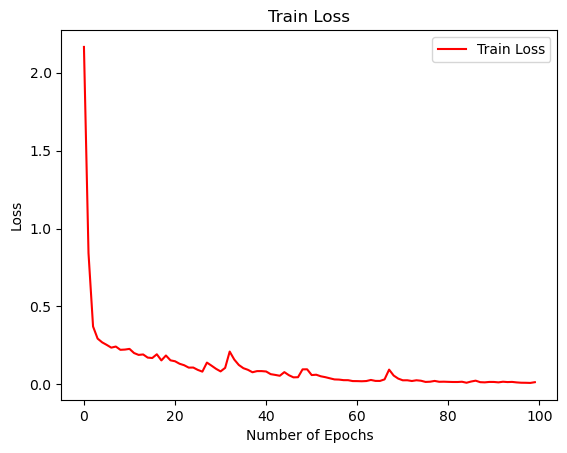

In [434]:
print(history.history.keys())

# Plot the loss curve for training
plt.plot(history.history['loss'], label='Train Loss', color='r')
plt.title("Train Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



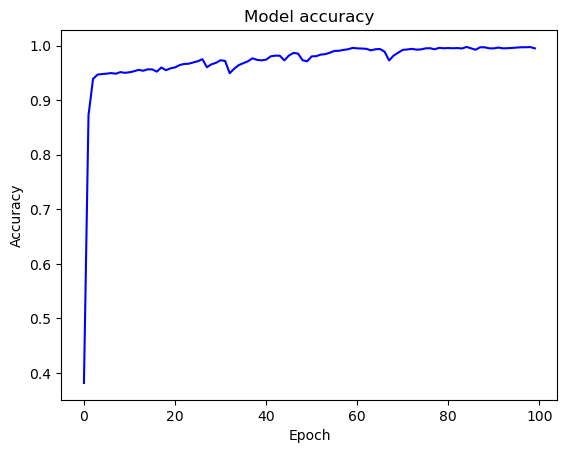

In [435]:
plt.plot(history.history['accuracy'],label='Model accuracy', color='b')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [436]:

print('Accurracy of model in training: ',max(history.history['accuracy'])) 


Accurracy of model in training:  0.9975087642669678


## Testing

In [437]:
# test = os.listdir("./test/")
# print(len(test))

In [438]:
# col = ['Image']
# test_data = pd.DataFrame(test, columns=col)
# test_data['Id'] = ''
# print(test_data.head())

In [529]:
x_test = prepareImages(X_test, X_test.shape[0], "train")
x_test /= 255

Image: 668bde398.jpg processed
Image: a008c9f21.jpg processed
Image: 6cb2ffa59.jpg processed
Image: 1232d5324.jpg processed
Image: 51e7efb28.jpg processed
Image: a2d8752f0.jpg processed
Image: 734929f0d.jpg processed
Image: d785ee130.jpg processed
Image: 2fe6351ab.jpg processed
Image: 0e4e5cb8a.jpg processed


In [545]:
predictions = model.predict(np.array(x_test), verbose=1)

106/106 [==============================] - 2s 18ms/step


In [546]:
print(predictions.shape)

(3362, 10)


In [589]:
testing = pd.DataFrame()
# print(predictions.shape)
# print(predictions)

for i, pred in enumerate(predictions):
    # print(label_encoder.inverse_transform(pred.argsort()[-5:][::-1]))
    ye = label_encoder.inverse_transform(pred.argsort()[-5:][::-1].tolist())
    # for j in label_encoder.inverse_transform(pred.argsort()[-5:][::-1]):
    #     # print(j)
    # print(ye[-1])
    ser = pd.Series(ye[-1])

    testing = testing.append(ser,ignore_index=True)

C:\Users\Angel\AppData\Local\Temp\ipykernel_11368\3958264522.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testing = testing.append(ser,ignore_index=True)
C:\Users\Angel\AppData\Local\Temp\ipykernel_11368\3958264522.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testing = testing.append(ser,ignore_index=True)
C:\Users\Angel\AppData\Local\Temp\ipykernel_11368\3958264522.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testing = testing.append(ser,ignore_index=True)
C:\Users\Angel\AppData\Local\Temp\ipykernel_11368\3958264522.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testing = testing.append(ser,ignore_index=Tr

In [595]:
# Evaluation:
print(X_test.head)
score = model.evaluate(X_test, testing, verbose=1)
print('The accuracy is: ', score[1])

<bound method NDFrame.head of               Image
3898  668bde398.jpg
6111  a008c9f21.jpg
4123  6cb2ffa59.jpg
718   1232d5324.jpg
3132  51e7efb28.jpg
...             ...
9284  f53dc47fa.jpg
1535  2809ec222.jpg
8748  e6e0feebb.jpg
7861  cf722e7d3.jpg
4004  694f9020c.jpg

[3362 rows x 1 columns]>


ValueError: in user code:

    File "c:\Users\Angel\anaconda3\lib\site-packages\keras\engine\training.py", line 1852, in test_function  *
        return step_function(self, iterator)
    File "c:\Users\Angel\anaconda3\lib\site-packages\keras\engine\training.py", line 1836, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Angel\anaconda3\lib\site-packages\keras\engine\training.py", line 1824, in run_step  **
        outputs = model.test_step(data)
    File "c:\Users\Angel\anaconda3\lib\site-packages\keras\engine\training.py", line 1788, in test_step
        y_pred = self(x, training=False)
    File "c:\Users\Angel\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Angel\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_4' (type Sequential).
    
    Input 0 of layer "conv2d_12" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 1)
    
    Call arguments received by layer 'sequential_4' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=string)
      • training=False
      • mask=None


In [441]:
# for i, pred in enumerate(predictions):
#     test_data.loc[i, 'Id'] = ' '.join(label_encoder.inverse_transform(pred.argsort()[-5:][::-1]))

In [442]:
# test_data.head(10)
# test_data.to_csv('submission_3.csv', index=False)